0 - INTRODUÇÃO

1 - BIBLIOTECAS DO PROJETO

Bibliotecas utilizadas para o scraping dos dados, criação e limpeza do dataframe, análise exploratória e modelagem de dados para regressão linear.

In [1]:
#Scraping
from selenium import webdriver
import time
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
#EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Machine learning


#configurações 

pd.set_option("max_colwidth", 1000)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 40)
sns.set_style("whitegrid")
sns.despine()




<Figure size 640x480 with 0 Axes>

2 - WEB SCRAPING COM SELENIUM

In [ ]:
#Criando a estrutura de scraping
service = Service()
options = webdriver.FirefoxOptions()
driver = webdriver.Firefox(options=options, service=service) #criando o webdriver
driver.get('https://www.vivareal.com.br/venda/?pagina=1') #abrindo o driver





In [ ]:
#lista para armazenar os dados obtidos
imoveis_lista  = []

In [ ]:
#acessando os xpaths e coletando os dados
for p in range(1,278): #277 páginas

         imoveis = driver.find_elements(By.CLASS_NAME, "property-card__content-link") #lista dos elements de cada item na página
         for imovel in imoveis:           
              titulo = imovel.find_element(By.XPATH, './/span[@class="property-card__title js-cardLink js-card-title"]').text
              price = imovel.find_element(By.XPATH, './/div[@class="property-card__price js-property-card-prices js-property-card__price-small"]').text
              area = imovel.find_element(By.XPATH, './/span[@class="property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area"]').text
              quartos = imovel.find_element(By.XPATH, './/li[@class="property-card__detail-item property-card__detail-room js-property-detail-rooms"]').text
              banheiros = imovel.find_element(By.XPATH, './/li[@class="property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom"]').text
              garagem = imovel.find_element(By.XPATH, './/li[@class="property-card__detail-item property-card__detail-garage js-property-detail-garages"]').text
              endereco = imovel.find_element(By.XPATH, './/span[@class="property-card__address"]').text
          
              imovel_view = {
                    'titulo':titulo,
                    "preco":price,
                    "area": area,
                    'quartos':quartos,
                    'banheiros': banheiros,
                    'garagem': garagem,
                    'endereco': endereco     
               }
              imoveis_lista.append(imovel_view)
         driver.find_element(By.XPATH, '/html/body/main/div[2]/div[1]/section/div[2]/div[2]/div/ul/li[9]/button').click()
         time.sleep(5)
     




3 - CRIANDO DATAFRAME

In [ ]:
moveis_br = pd.DataFrame(imoveis_lista)
imoveis_br

In [ ]:
#verificando dados duplicados
imoveis_br.duplicated().value_counts()

In [ ]:
#removendo dados duplicados
imoveis_br = imoveis_br.drop_duplicates()
imoveis_br

In [ ]:
#salvando dados como csv
imoveis_br.to_csv("imoveis_br.csv")

3.1 - LIMPEZA DO DATAFRAME

In [9]:
df = pd.read_csv('imoveis_br.csv', index_col=0 )
df = df.drop([99, 1181, 3248, 3255, 5117, 5130, 5285, 5380, 5511, 5754, 7611, 7770,
       7943, 8562, 8945, 9631]) #removendo info de terrenos/lotes
df = df.reset_index(drop=True)


#verificando
df

,titulo,preco,area,quartos,banheiros,garagem,endereco
0,"Apartamento com 3 Quartos à Venda, 150m²",R$ 320.000\nPreço abaixo do mercado,150,3 Quartos,4 Banheiros,4 Vagas,"Travessa Felício, 41 - Cascadura, Rio de Janeiro - RJ"
1,"Casa com 3 Quartos à Venda, 74m²",R$ 98.556,74,3 Quartos,2 Banheiros,3 Vagas,"Rua José Bolonha, 547 - Igacaba, Pedregulho - SP"
2,"Casa com 3 Quartos à Venda, 450m²",R$ 550.000,450,3 Quartos,5 Banheiros,10 Vagas,"Avenida Ponte Alta Norte, 08 - Ponte Alta Norte, Brasília - DF"
3,"Casa com 3 Quartos à Venda, 110m²",R$ 230.000,110,3 Quartos,2 Banheiros,1 Vaga,"Ponte Marcos Freire II, 56 - Marcos Freire II, Nossa Senhora do Socorro - SE"
4,"Apartamento com 3 Quartos à Venda, 95m²",R$ 485.000,95,3 Quartos,3 Banheiros,2 Vagas,"Avenida Presidente Kennedy, 432 - Piedade, Jaboatão dos Guararapes - PE"
...,...,...,...,...,...,...,...
8925,"Apartamento com 2 Quartos à Venda, 46m²",R$ 265.000,46,2 Quartos,1 Banheiro,1 Vaga,"Rua Cravinhos, 0 - Jardim Paulistano, Ribeirão Preto - SP"
8926,"Apartamento com Quarto à Venda, 56m²",R$ 640.000,56,1 Quarto,2 Banheiros,1 Vaga,"Avenida Wladimir Meirelles Ferreira, 0 - Jardim Botânico, Ribeirão Preto - SP"
8927,"Casa de condomínio com 3 Quartos à Venda, 130m²",R$ 650.000,130,3 Quartos,1 Banheiro,2 Vagas,"Bonfim Paulista, Ribeirão Preto - SP"
8928,"Apartamento com 3 Quartos à Venda, 118m²",R$ 600.000,118,3 Quartos,3 Banheiros,1 Vaga,"Rua Humaitá, 0 - Santa Cruz do José Jacques, Ribeirão Preto - SP"


In [10]:
df.dtypes

titulo       object
preco        object
area         object
quartos      object
banheiros    object
garagem      object
endereco     object
dtype: object

3.2 - LIMPEZA DA FEATURE 'TITULO'

In [11]:
df['titulo']

0              Apartamento com 3 Quartos à Venda, 150m²
1                      Casa com 3 Quartos à Venda, 74m²
2                     Casa com 3 Quartos à Venda, 450m²
3                     Casa com 3 Quartos à Venda, 110m²
4               Apartamento com 3 Quartos à Venda, 95m²
                             ...                       
8925            Apartamento com 2 Quartos à Venda, 46m²
8926               Apartamento com Quarto à Venda, 56m²
8927    Casa de condomínio com 3 Quartos à Venda, 130m²
8928           Apartamento com 3 Quartos à Venda, 118m²
8929    Casa de condomínio com 3 Quartos à Venda, 272m²
Name: titulo, Length: 8930, dtype: object

In [12]:
#tipo de dado armazenado
type(df['titulo'][0])

str

É esperado e desejado que o título seja, de fato, uma string. Quando a isso a coluna está adequada. Farei apenas uma mudança estética na coluna para melhor leitura.

In [13]:
#substituindo "," por " com"
titulo = []
for t in df['titulo']:
    t = t.replace(",", " com")
    titulo.append(t)

In [14]:
df['titulo'] = titulo
df['titulo'] = df['titulo'].astype(str)

3.3 - LIMPEZA DA FEATURE 'PRECO'

In [15]:
df["preco"]

0       R$ 320.000\nPreço abaixo do mercado
1                                 R$ 98.556
2                                R$ 550.000
3                                R$ 230.000
4                                R$ 485.000
                       ...                 
8925                             R$ 265.000
8926                             R$ 640.000
8927                             R$ 650.000
8928                             R$ 600.000
8929                           R$ 1.500.000
Name: preco, Length: 8930, dtype: object

In [16]:
#tipo armazenado
type(df["preco"][0])

str

É esperado que a feature 'preco' seja do tipo numérico (float) para isso é necessário limpar os 'R$' e 'Preço abaixo do mercado'.

In [17]:
#removendo cifrão
preco = [p.replace("R$ ","") for p in df["preco"]]
preco = [p.replace("\nPreço abaixo do mercado", "") for p in preco]


df["preco"] = preco

In [18]:
#Verificando
df["preco"]


0         320.000
1          98.556
2         550.000
3         230.000
4         485.000
          ...    
8925      265.000
8926      640.000
8927      650.000
8928      600.000
8929    1.500.000
Name: preco, Length: 8930, dtype: object

In [19]:
type(df["preco"][0])

str

A aparência dos dados contidos em 'preco' está correta, porém o tipo de dado não é o adequado ainda.

In [20]:
df["preco"]

0         320.000
1          98.556
2         550.000
3         230.000
4         485.000
          ...    
8925      265.000
8926      640.000
8927      650.000
8928      600.000
8929    1.500.000
Name: preco, Length: 8930, dtype: object

In [21]:
#Necessário retirar o ponto para comunicar a dimensão correta dos dados
df["preco"] = [p.replace(".","") for p in df["preco"]]
df["preco"] = df["preco"].astype(float)

In [22]:
df["preco"]

0        320000.0
1         98556.0
2        550000.0
3        230000.0
4        485000.0
          ...    
8925     265000.0
8926     640000.0
8927     650000.0
8928     600000.0
8929    1500000.0
Name: preco, Length: 8930, dtype: float64

Dados agora estão no formato correto.

3.4 - LIMPEZA DA FEATURE 'area'

In [23]:
df['area']

0       150
1        74
2       450
3       110
4        95
       ... 
8925     46
8926     56
8927    130
8928    118
8929    272
Name: area, Length: 8930, dtype: object

In [24]:
#verificando o tipo de dado
type(df['area'][0])

str

Apesar de termos número inteiros na coluna, o tipo de dado delas está como str. 

In [25]:
#fazendo a mudança do tipo de dados e salvando
df['area'] = df['area'].astype(int)

In [26]:
#verificando
type(df['area'][0])

numpy.int32

3.5 - LIMPEZA DA  FEATURE 'quartos'

In [27]:
df['quartos']

0       3 Quartos
1       3 Quartos
2       3 Quartos
3       3 Quartos
4       3 Quartos
          ...    
8925    2 Quartos
8926     1 Quarto
8927    3 Quartos
8928    3 Quartos
8929    3 Quartos
Name: quartos, Length: 8930, dtype: object

É preciso remover a string 'Quartos' e converter para o tipo int.

In [28]:
#removendo str
df['quartos'] = [q.replace(" Quartos","") for q in df['quartos']]
df['quartos'] = [q.replace(" Quarto", "") for q in df['quartos']]
df['quartos'] = [q.replace("--", "0") for q in df['quartos']]

Todas as ocorrências de 'quartos' == '--' são de terrenos/loteamentos indicando que não existem quartos nesses imoveis pois ainda não foram construídos.

In [29]:
#mudando o tipo de dados
df['quartos'] = df['quartos'].astype(int)
df['quartos'].dtypes

dtype('int32')

3.6 - LIMPEZA DA FEATURE 'BANHEIROS'

In [30]:
df['banheiros']

0       4 Banheiros
1       2 Banheiros
2       5 Banheiros
3       2 Banheiros
4       3 Banheiros
           ...     
8925     1 Banheiro
8926    2 Banheiros
8927     1 Banheiro
8928    3 Banheiros
8929    4 Banheiros
Name: banheiros, Length: 8930, dtype: object

In [31]:
#removendo as str
df['banheiros'] = [q.replace(" Banheiros","") for q in df['banheiros']]
df['banheiros'] = [q.replace(" Banheiro", "") for q in df['banheiros']]
df['banheiros'] = [q.replace("--", "0") for q in df['banheiros']]

Assim como na feature anterior temos '--' indicando loteamentos e terrenos. O tratamento seguiu o mesmo.

In [32]:
#Mudando o tipo de dado
df['banheiros'] = df['banheiros'].astype(int)
df['banheiros'].dtypes

dtype('int32')

3.7 - LIMPEZA DA FEATURE 'GARAGEM'

In [33]:
df['garagem']

0        4 Vagas
1        3 Vagas
2       10 Vagas
3         1 Vaga
4        2 Vagas
          ...   
8925      1 Vaga
8926      1 Vaga
8927     2 Vagas
8928      1 Vaga
8929     5 Vagas
Name: garagem, Length: 8930, dtype: object

In [34]:
df['garagem'] = [q.replace(" Vagas","") for q in df['garagem']]
df['garagem'] = [q.replace(" Vaga", "") for q in df['garagem']]
df['garagem'] = [q.replace("--", "0") for q in df['garagem']]

In [35]:
df['garagem'] = df['garagem'].astype(int)
df['garagem'].dtypes

dtype('int32')

3.8 - LIMPEZA DA FEATURE 'ENDERECO'

Essa feature será dissolvida e outras duas novas adicionadas, são elas: Cidade e Estado.

In [36]:
df['endereco']

0                               Travessa Felício, 41 - Cascadura, Rio de Janeiro - RJ
1                                    Rua José Bolonha, 547 - Igacaba, Pedregulho - SP
2                      Avenida Ponte Alta Norte, 08 - Ponte Alta Norte, Brasília - DF
3        Ponte Marcos Freire II, 56 - Marcos Freire II, Nossa Senhora do Socorro - SE
4             Avenida Presidente Kennedy, 432 - Piedade, Jaboatão dos Guararapes - PE
                                            ...                                      
8925                        Rua Cravinhos, 0 - Jardim Paulistano, Ribeirão Preto - SP
8926    Avenida Wladimir Meirelles Ferreira, 0 - Jardim Botânico, Ribeirão Preto - SP
8927                                             Bonfim Paulista, Ribeirão Preto - SP
8928                 Rua Humaitá, 0 - Santa Cruz do José Jacques, Ribeirão Preto - SP
8929                Rua Arlindo Rivoiro, 0 - Recreio das Acácias, Ribeirão Preto - SP
Name: endereco, Length: 8930, dtype: object

In [37]:
ender_split = df['endereco'].str.split("-")
ender_split

0                               [Travessa Felício, 41 ,  Cascadura, Rio de Janeiro ,  RJ]
1                                    [Rua José Bolonha, 547 ,  Igacaba, Pedregulho ,  SP]
2                      [Avenida Ponte Alta Norte, 08 ,  Ponte Alta Norte, Brasília ,  DF]
3        [Ponte Marcos Freire II, 56 ,  Marcos Freire II, Nossa Senhora do Socorro ,  SE]
4             [Avenida Presidente Kennedy, 432 ,  Piedade, Jaboatão dos Guararapes ,  PE]
                                              ...                                        
8925                        [Rua Cravinhos, 0 ,  Jardim Paulistano, Ribeirão Preto ,  SP]
8926    [Avenida Wladimir Meirelles Ferreira, 0 ,  Jardim Botânico, Ribeirão Preto ,  SP]
8927                                              [Bonfim Paulista, Ribeirão Preto ,  SP]
8928                 [Rua Humaitá, 0 ,  Santa Cruz do José Jacques, Ribeirão Preto ,  SP]
8929                [Rua Arlindo Rivoiro, 0 ,  Recreio das Acácias, Ribeirão Preto ,  SP]
Name: ende

In [38]:
uf = []
for i in ender_split:
    uf.append(str(i[-1].strip()))


In [39]:
#Criando a feature UF
df['UF'] = uf
df

,titulo,preco,area,quartos,banheiros,garagem,endereco,UF
0,Apartamento com 3 Quartos à Venda com 150m²,320000.0,150,3,4,4,"Travessa Felício, 41 - Cascadura, Rio de Janeiro - RJ",RJ
1,Casa com 3 Quartos à Venda com 74m²,98556.0,74,3,2,3,"Rua José Bolonha, 547 - Igacaba, Pedregulho - SP",SP
2,Casa com 3 Quartos à Venda com 450m²,550000.0,450,3,5,10,"Avenida Ponte Alta Norte, 08 - Ponte Alta Norte, Brasília - DF",DF
3,Casa com 3 Quartos à Venda com 110m²,230000.0,110,3,2,1,"Ponte Marcos Freire II, 56 - Marcos Freire II, Nossa Senhora do Socorro - SE",SE
4,Apartamento com 3 Quartos à Venda com 95m²,485000.0,95,3,3,2,"Avenida Presidente Kennedy, 432 - Piedade, Jaboatão dos Guararapes - PE",PE
...,...,...,...,...,...,...,...,...
8925,Apartamento com 2 Quartos à Venda com 46m²,265000.0,46,2,1,1,"Rua Cravinhos, 0 - Jardim Paulistano, Ribeirão Preto - SP",SP
8926,Apartamento com Quarto à Venda com 56m²,640000.0,56,1,2,1,"Avenida Wladimir Meirelles Ferreira, 0 - Jardim Botânico, Ribeirão Preto - SP",SP
8927,Casa de condomínio com 3 Quartos à Venda com 130m²,650000.0,130,3,1,2,"Bonfim Paulista, Ribeirão Preto - SP",SP
8928,Apartamento com 3 Quartos à Venda com 118m²,600000.0,118,3,3,1,"Rua Humaitá, 0 - Santa Cruz do José Jacques, Ribeirão Preto - SP",SP


In [40]:
df['UF'].unique()

array(['RJ', 'SP', 'DF', 'SE', 'PE', 'MG', 'BA', 'RS', 'GO', 'SC', 'ES',
       'PR', 'MA', 'PI', 'AL', 'MT', 'CE', 'AM', 'PB', 'PA', 'TO', 'RO',
       'RN', 'Araçagy, MA', 'MS', 'AC', 'BR 116,', 'RR', 'Zona Rural, SP'],
      dtype=object)

Corrigindo estados com nomes errados.

In [41]:
#Substituindo os valores errados
df['UF'].replace("Araçagy, MA", "MA", inplace=True)
df['UF'].replace("Zona Rural, SP", "SP", inplace=True)
df['UF'].replace("BR 116,", "RS", inplace=True)


In [42]:
#Criando a feature cidade
cidade_bairro = df['endereco'].str.split(",")

cidade_uf = []
for i in cidade_bairro:
    cidade_uf.append(i[-1].strip())

cidade_uf[0].split('-')

['Rio de Janeiro ', ' RJ']

In [43]:
cidade = []
for c in cidade_uf:
    cidade.append(str(c.split("-")[0].strip()))

In [44]:
#feature cidade
df['cidade'] = cidade
df['cidade'] = df['cidade'].astype(str)

In [45]:
#resolvendo problemas de dados errados em 'cidade'
df['cidade'].replace("Araçagy, MA", "MA", inplace=True)
df['cidade'].replace("Zona Rural, SP", "SP", inplace=True)
df['cidade'].replace("", "Nova Petrópolis", inplace=True)
df['endereco'].replace("BR 116,", "BR 116, Nova Petrópolis - RS", inplace=True)


3.9 - CRIANDO A FEATURE 'TIPO_IMOVEL'

In [46]:
#Extraindo a informação 'tipo' da coluna 'titulo'
tipo = []
titulos = df['titulo'].str.split(" ")

for t in titulos:
    tipo.append(str(t[0].strip())) #string

In [47]:
#atribuindo a nova feature ao dataframe
df["tipo_imovel"] = tipo

'Prédio/Edifício', 'Prédio/Edificio' e 'Edifício' referem-se a mesma coisa. 'Ponto' e 'Imóvel' se referem, também, a mesma coisa. Agrupei 'Flat' e 'Apartamento' uma vez que são, basicamente, o mesmo tipo de imóvel. Outras modificações também foram feitas para evitar poluição.

In [48]:
df['tipo_imovel'].replace("Flat","Apartamento", inplace=True)
df['tipo_imovel'].replace("Loft","Apartamento", inplace=True)
df['tipo_imovel'].replace("Kitnet/Conjugado","Casa", inplace=True)



FILTRANDO CASAS E APARTAMENTOS

O principal objeto de interesse dessa análise são os imóveis do tipo casa ou apartamento. Por isso vamos selecionar todas as obervações desses dois tipos.

In [49]:
drop_linhas = df.loc[(df['tipo_imovel'] != 'Casa') & (df['tipo_imovel'] !='Apartamento')].index

In [50]:
df = df.drop(drop_linhas)

4 - EXPORTANDO O DATAFRAME PRONTO

In [51]:
#salvando o dataframe pronto pra uso
df.to_csv("imoveis_brasil.csv", sep=",", encoding='utf-8',index=False)

5 - DICIONÁRIO DE DADOS

Essa seção é dedicada a fornecer mais informações sobre o dataset criado.


1 - titulo = descrição simplificada do imóvel. **Datatype** = string

2 - preco = Preço do imóvel. Separador de decimal está como ponto.  **Datatype** = float

3 - area = área do imóvel refere-se à área construída.  **Datatype** = int

4 - quartos = quantidade de quartos disponíveis no imóvel. **Datatype** = int

5 - banheiros = quantidade de banheiros disponíveis no imóvel. **Datatype** = int

6 - garagem = quantidade de vagas na garagem disponíveis no imóvel. **Datatype** = int

7 - endereco = endereço completo do imóvel. **Datatype** = string

8 - UF = estado onde está localizado o imóvel. **Datatype** = string

9 - tipo_imovel = classificação do imóvel quanto ao tipo, se casa ou apartamento. **Datatype** = string




6 - ANÁLISE EXPLORATÓRIA DE DADOS

Seção para análise exploratória afim de gerar inteligência a partir dos dados obtidos. Nessa etapa busco conhecer melhor os dados e responder perguntas que possam ser pertinentes como:

- Quais o tipos de imóveis com maiores valores?
- Quais os estados com média de imóveis mais caros? E os mais baratos?
- Qual a influência da quantidade de quartos no valor dos imóveis? Quando mais quartos mais caros?
- Área é o melhor preditor de preço? 
- Qual a média de preço com base no tipo de imóvel? Quais são os imóveis com maior média? E os com menores médias?
- Qual seria o melhor estado para um cidadão brasileiro com renda média? 


6.1 - ANÁLISE UNIVARIADA

Entendimento mais aprofundado de cada feature do dataset.

6.2 - PREÇO

A primeira feature do dataset é apenas o título do anúncio do imóvel no site, não necessariamente traz alguma informação relevante então começarei a análise pela feature 'preco'.

In [120]:
#informação estatística básica
df['preco']

0        320000.0
1         98556.0
2        550000.0
3        230000.0
4        485000.0
          ...    
8925     265000.0
8926     640000.0
8927     650000.0
8928     600000.0
8929    1500000.0
Name: preco, Length: 7030, dtype: float64

In [53]:
df.loc[df['preco']==105000042.0]

,titulo,preco,area,quartos,banheiros,garagem,endereco,UF,cidade,tipo_imovel
1388,Casa com 3 Quartos à Venda com 345m²,105000042.0,345,3,4,2,"Avenida Maria José Santos, 222 - Anizio Amancio de Oliveira, Itabaiana - SE",SE,Itabaiana,Casa


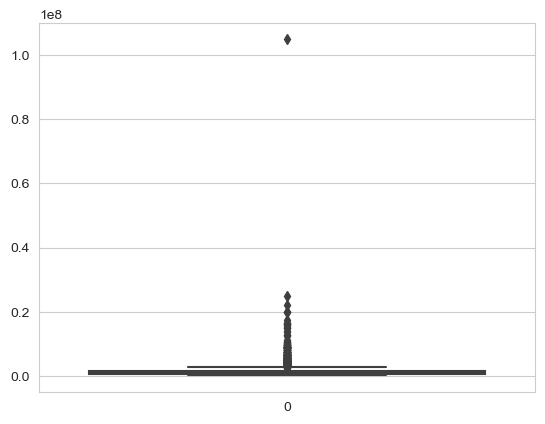

In [54]:
_=sns.boxplot(df['preco'])

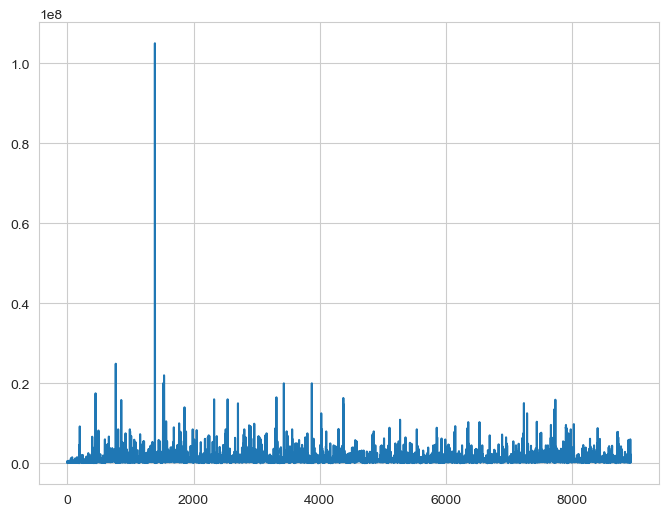

In [55]:
_=plt.figure(figsize=(8,6))
_=plt.plot(df['preco'])

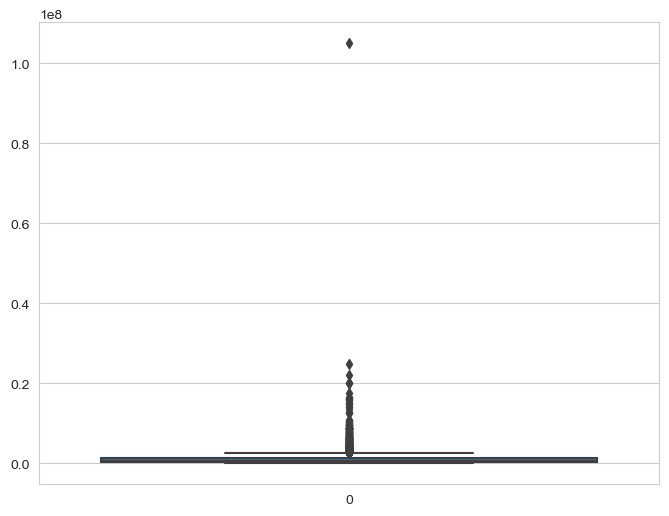

In [56]:
_=plt.figure(figsize=(8,6))
_=sns.boxplot(df['preco'])


In [57]:
#Coeficiente de variação
def cv(a):
    media = a.mean()
    std = a.std()
    return (std/media)*100

In [58]:
cv(df['preco'])

173.22080079089417

Temos uma Heterogeneidade enorme com um cv de 173% para a coluna de preço.

In [59]:
df['preco'].describe()

count    7.030000e+03
mean     1.132181e+06
std      1.961173e+06
min      1.500000e+04
25%      3.700000e+05
50%      6.500000e+05
75%      1.277000e+06
max      1.050000e+08
Name: preco, dtype: float64

Com desvio padrão de 1.3x10^6 indica que os dados estão muito dispersos em torno da média, a razão para isso é provavelmente a diferença de natureza entre os imóveis, temos casas e apartamentos de padrões socioeconômicos diferentes.


In [60]:
#Função para quantificar outliers
def outliers(dados):

  '''Número de outliers'''

  primeiro_quantil = np.percentile(dados, 25)
  terceiro_quantil = np.percentile(dados, 75)
  IQR = terceiro_quantil-primeiro_quantil

  #limite superior
  Ls = terceiro_quantil+1.5*IQR
  #limite inferior
  Li = primeiro_quantil-1.5*IQR
  
  outlier = [x for x in dados if Li > x or x > Ls]

  return len(outlier)

In [61]:
outliers(df['preco'])

598

In [62]:
(598/7030)*100

8.506401137980085

Temos 598 outliers no conjunto de dados. O que corresponde a 8.5% dos imóveis no dataframe.

6.3 - ÁREA

Análise univariada da feature 'area'.

In [63]:
df['area']

0       150
1        74
2       450
3       110
4        95
       ... 
8925     46
8926     56
8927    130
8928    118
8929    272
Name: area, Length: 7030, dtype: int32

In [64]:
df['area'].describe()

count      7030.000000
mean        192.947511
std        3430.521932
min          10.000000
25%          64.000000
50%         100.000000
75%         170.750000
max      276540.000000
Name: area, dtype: float64

Destaca-se o alto desvio padrão dos valores de área dos imóveis no dataframe. Vale também notar que metade dos imóveis têm menos de 100 m².

<Axes: >

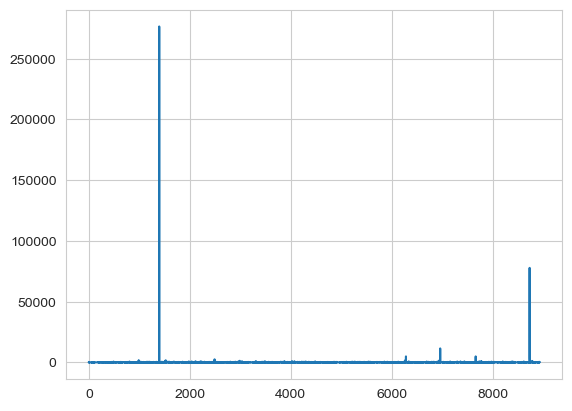

In [65]:
df['area'].plot()

In [66]:
df.loc[df['area'] > 50000]

,titulo,preco,area,quartos,banheiros,garagem,endereco,UF,cidade,tipo_imovel
1395,Casa com 4 Quartos à Venda com 276540m²,989000.0,276540,4,4,3,"Avenida do Comércio, 1 - Vila São João, Goiânia - GO",GO,Goiânia,Casa
8730,Casa de condomínio com 7 Quartos à Venda com 77867m²,4900000.0,77867,7,10,12,"Jardim Acapulco , Guarujá - SP",SP,Guarujá,Casa


Apenas duas casas têm áreas maiores que 50.000 m².

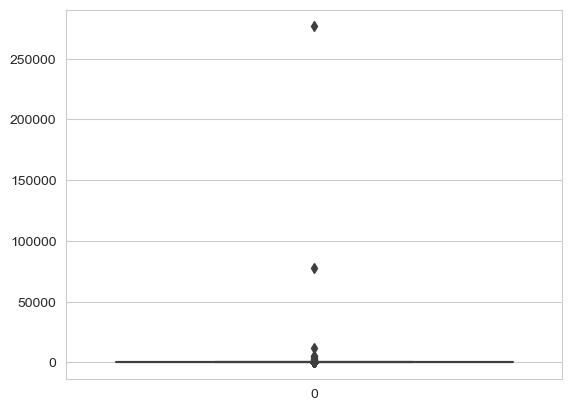

In [67]:
_=sns.boxplot(df['area'])

Assim como na coluna de preço temos a presença de outliers.

In [68]:
outliers(df['area'])

439

Temos 439 outliers na coluna área.

In [69]:
#coeficiente de variação
cv(df['area'])

1777.9560460786602

A variação de área é muito maior do que a variação de preço, temos cv de 1778% na coluna de área. Indicando que os dados são muito mais dispersos na área do que no preço.

6.4 - QUARTOS

Quantidade de quartos dos imóveis presentes no dataframe.

In [70]:
df['quartos']

0       3
1       3
2       3
3       3
4       3
       ..
8925    2
8926    1
8927    3
8928    3
8929    3
Name: quartos, Length: 7030, dtype: int32

In [71]:
df['quartos'].describe()

count    7030.000000
mean        2.649929
std         0.970285
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        15.000000
Name: quartos, dtype: float64

Metade dos imóveis têm menos de 3 quartos e até 75% dos imóveis têm no máximo 3 quartos. Casas com mais de 3 quartos são relativamente raras no dataset presente.

In [72]:
df.loc[df['quartos']==0]

,titulo,preco,area,quartos,banheiros,garagem,endereco,UF,cidade,tipo_imovel
222,Apartamento à Venda com 26m²,164000.0,26,0,1,0,"Rua dos Inválidos, 183 - Centro, Rio de Janeiro - RJ",RJ,Rio de Janeiro,Apartamento
2115,Casa à Venda com 1000m²,5300000.0,1000,0,7,0,"Rua Samuel Fragoso Coimbra, 26 - Vila Nova Valinhos, Valinhos - SP",SP,Valinhos,Casa


Duas observações não contam com número de quartos, uma delas é uma casa comercial com três casas para venda. 


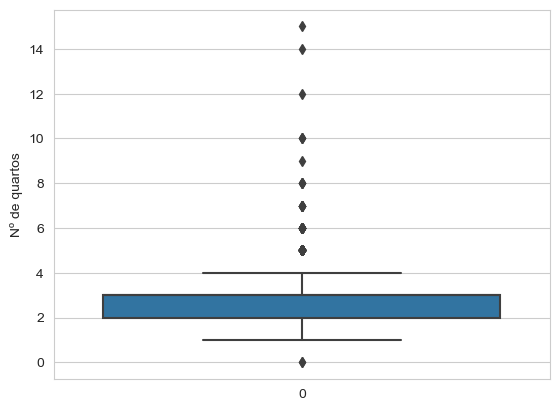

In [73]:
_=sns.boxplot(df['quartos'])
_=plt.ylabel("Nº de quartos")

Possível verificar que existem alguns outliers que são imóveis com um número de quartos maior que 4 e menor do que 1. Quantos outliers temos?

In [74]:
#contando quantos imóveis com mais de 4 quartos existem
outliers(df['quartos'])

184

In [75]:
(184/df['quartos'].count())*100


2.617354196301565

O número de imóveis com mais de 4 quartos corresponde a 2.6% dos imóveis do dataframe.

In [76]:
#coeficiente de variação
cv(df['quartos'])

36.615516452042755

Existem uma grande variabilidade no que diz respeito ao número de quartos dos imóveis.

6.5 - BANHEIROS

Análise dos imóveis com relação ao número de banheiros.

In [77]:
df['banheiros']

0       4
1       2
2       5
3       2
4       3
       ..
8925    1
8926    2
8927    1
8928    3
8929    4
Name: banheiros, Length: 7030, dtype: int32

In [78]:
#estátistica básica
df['banheiros'].describe()

count    7030.000000
mean        2.474538
std         1.490948
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: banheiros, dtype: float64

Metáde dos imóveis no dataframe têm até 2 banheiros e 75% deles, até 3.

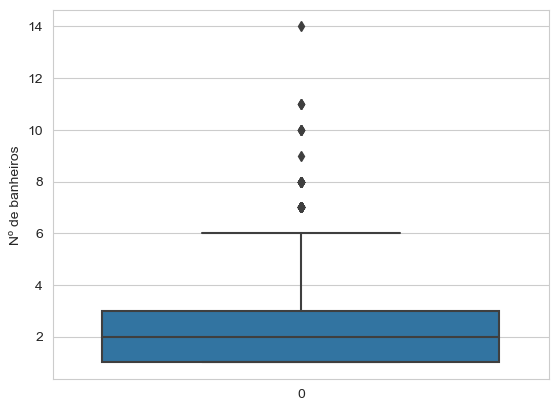

In [79]:
_=sns.boxplot(df['banheiros'])
_=plt.ylabel("Nº de banheiros")

Metade dos imóveis tem até 2 banheiros, temos alguns outliers que são imóveis com mais de 6 banheiros. Quantos outliers temos ao total?

In [80]:
df['banheiros'].loc[df['banheiros'] > 6].count()

82

In [81]:
df['banheiros'].count()

7030

In [82]:
(82/7030)*100

1.166429587482219

Temos 82 imóveis com mais de 6 banheiros no dataframe. O que corresponde a 1.17% dos imóveis.

In [83]:
#Coeficiente de variabilidade
cv(df['banheiros'])

60.25156955317384

Temos alta variabilidade no que diz respeito a número de banheiros também. Porém, menos do que com relação ao número de quartos. Os imóveis do dataframe variam mais em número de banheiros do que em quartos.

6.6 - GARAGEM

Análise do número de vagas na garagem dos imóveis no dataframe.

In [84]:
df['garagem']

0        4
1        3
2       10
3        1
4        2
        ..
8925     1
8926     1
8927     2
8928     1
8929     5
Name: garagem, Length: 7030, dtype: int32

In [85]:
df['garagem'].describe()

count    7030.000000
mean        1.965292
std         1.851260
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        82.000000
Name: garagem, dtype: float64

Mais da metade dos imóveis, na verdade, 3/4 dos imóveis têm até 2 vagas garagem.

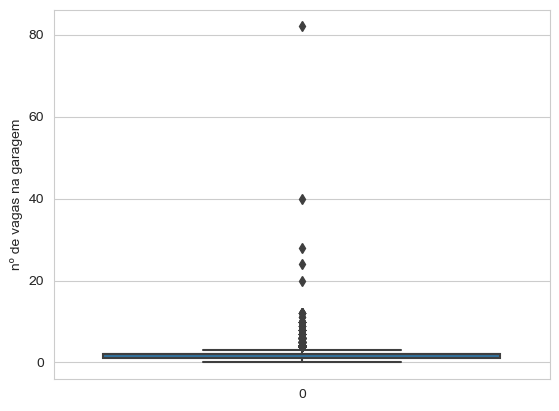

In [86]:
_=sns.boxplot(df['garagem'])
_=plt.ylabel('nº de vagas na garagem')

In [87]:
#Número de outliers
outliers(df['garagem'])

1071

In [88]:
(1071/7030)*100

15.23470839260313

Temos 15% de outliers com relação ao número de vagas na garagem entre os imóveis.

In [89]:
cv(df['garagem'])

94.19772249151626

Com 94% de CV sabemos que os dados variam bastante com relação ao número de vagas na garagem.

In [90]:
df.columns

Index(['titulo', 'preco', 'area', 'quartos', 'banheiros', 'garagem',
       'endereco', 'UF', 'cidade', 'tipo_imovel'],
      dtype='object')

6.7 - ENDEREÇO

Endereço dos imóveis.

In [91]:
df['endereco']

0                               Travessa Felício, 41 - Cascadura, Rio de Janeiro - RJ
1                                    Rua José Bolonha, 547 - Igacaba, Pedregulho - SP
2                      Avenida Ponte Alta Norte, 08 - Ponte Alta Norte, Brasília - DF
3        Ponte Marcos Freire II, 56 - Marcos Freire II, Nossa Senhora do Socorro - SE
4             Avenida Presidente Kennedy, 432 - Piedade, Jaboatão dos Guararapes - PE
                                            ...                                      
8925                        Rua Cravinhos, 0 - Jardim Paulistano, Ribeirão Preto - SP
8926    Avenida Wladimir Meirelles Ferreira, 0 - Jardim Botânico, Ribeirão Preto - SP
8927                                             Bonfim Paulista, Ribeirão Preto - SP
8928                 Rua Humaitá, 0 - Santa Cruz do José Jacques, Ribeirão Preto - SP
8929                Rua Arlindo Rivoiro, 0 - Recreio das Acácias, Ribeirão Preto - SP
Name: endereco, Length: 7030, dtype: object

In [92]:
df['endereco'].nunique()

5805

Temos 5805 endereços distintos, o que indica que temos mais de um imóvel com o mesmo endereço.

6.8 - UF

Estado em que o móvel está.

In [93]:
df['UF']

0       RJ
1       SP
2       DF
3       SE
4       PE
        ..
8925    SP
8926    SP
8927    SP
8928    SP
8929    SP
Name: UF, Length: 7030, dtype: object

In [94]:
#não temos dados faltantes
df['UF'].isna().sum()

0

In [95]:
df['UF'].value_counts()

UF
SP    3960
RJ     716
PE     498
RS     256
MG     191
SC     179
ES     170
SE     167
GO     152
PR     150
MA     126
BA     113
CE      82
AM      57
PB      42
DF      40
PA      32
PI      26
RN      26
AL      16
MT      12
TO       7
MS       5
RO       4
AC       3
Name: count, dtype: int64

São Paulo (SP) é o estado com o maior número de imóveis no dataframe. O Acre (AC) é o estado com menor número de imóveis.

In [96]:
def plot(dados):
  
  '''Função pra plotar dados categóricos'''
  x=dados.value_counts().index
  y=dados.value_counts().values

  _=plt.figure(figsize=(9,6))
  _=ax=sns.barplot(x=x, y=y, color='#0397AB')

  _=ax.set_ylabel("Nº imóveis", weight='heavy')
  _=ax.set_xlabel("UF", weight='heavy')
  _=ax.set_title("Nº de imóveis por estado", weight='heavy')

  #label
  for c in ax.containers:
     ax.bar_label(c)



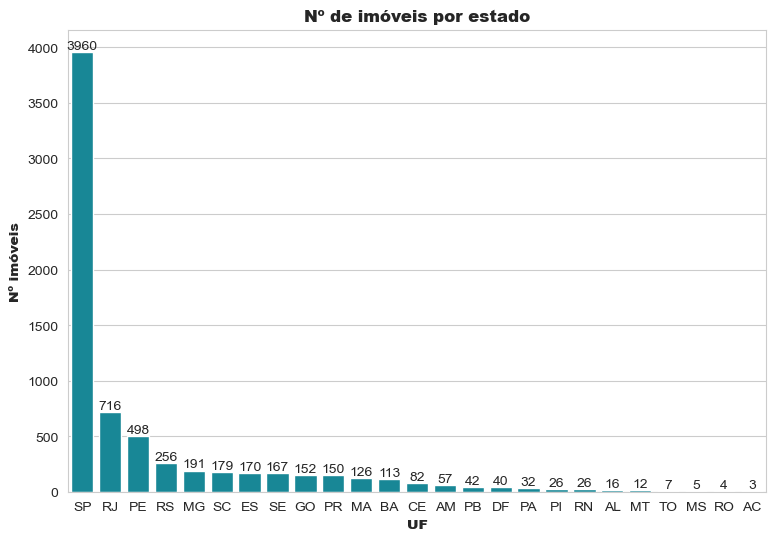

In [97]:
plot(df['UF'])

6.9 - CIDADE

Análise da coluna cidade.

In [98]:
df['cidade'].nunique()

339

Temos imóveis de 339 cidades diferentes.

In [99]:
df['cidade'].value_counts()

cidade
São Paulo            1638
Rio de Janeiro        486
Ribeirão Preto        313
Campinas              303
Recife                207
                     ... 
Salto de Pirapora       1
Maracanaú               1
Belford Roxo            1
Caruaru                 1
Pará de Minas           1
Name: count, Length: 339, dtype: int64

São Paulo (capital) e Rio de Janeiro são as cidades com mais imóveis no dataframe.

6.10 - TIPO DE IMÓVEL

Tipo do imóvel - Casa ou Apartamento.

In [100]:
df['tipo_imovel']

0       Apartamento
1              Casa
2              Casa
3              Casa
4       Apartamento
           ...     
8925    Apartamento
8926    Apartamento
8927           Casa
8928    Apartamento
8929           Casa
Name: tipo_imovel, Length: 7030, dtype: object

In [114]:
df['tipo_imovel'].dtypes

dtype('O')

In [101]:
df['tipo_imovel'].nunique()

2

In [102]:
df['tipo_imovel'].value_counts()

tipo_imovel
Apartamento    4444
Casa           2586
Name: count, dtype: int64

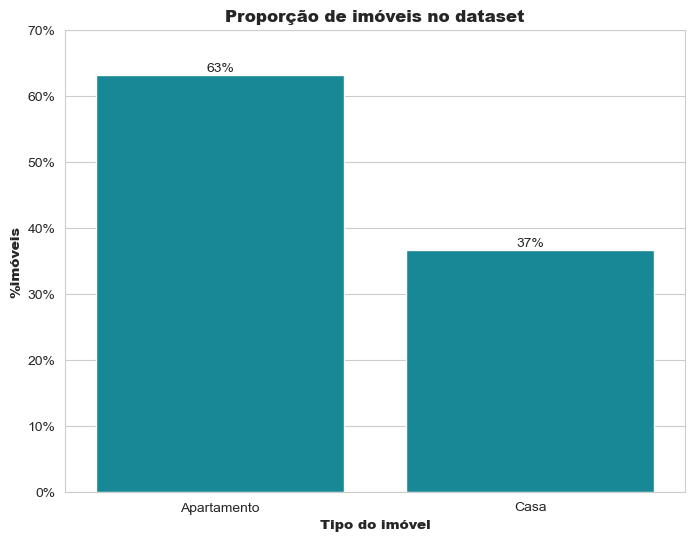

In [112]:
x=df['tipo_imovel'].value_counts().index
y=df['tipo_imovel'].value_counts(1).values

_=plt.figure(figsize=(8,6))
_=ax=sns.barplot(x=x, y=y, color='#0397AB')

_=ax.set_ylabel('%'  'imóveis', weight='heavy')
_=ax.set_xlabel("Tipo do imóvel", weight='heavy')
_=ax.set_title("Proporção de imóveis no dataset", weight='heavy')

#formatando
atual_axes = plt.gca().get_yticks()
ax.yaxis.set_ticks(atual_axes)
plt.gca().set_yticklabels(['{:,.0%}'.format(i) for i in atual_axes])

#label
for c in ax.containers:
   ax.bar_label(c,fmt='{:,.0%}' )

A quantidade de apartamentos é quase o dobro da de casas no dataframe. 

7 - ANÁLISE BIVARIADA

Nessa etapa analisarei os dados relacionando diferentes colunas afim de extrair maiores informações.

7.1 - Variabilidade do preço

Busco identificar quais aspectos parecem influenciar mais o preço de imóveis.

- Existe relação entre a área do imóvel e seu valor?
- Quanto ao número de quartos, banheiros e vagas na garagem?
- Existe diferença estatística entre casas e apartamentos no que diz respeito ao preço?
- O preço varia mais entre casas ou apartamentos?
- Quais estados com imóveis mais caros e mais baratos?
- Qual estado apresenta maior variabilidade de preços? 

In [115]:
df.columns

Index(['titulo', 'preco', 'area', 'quartos', 'banheiros', 'garagem',
       'endereco', 'UF', 'cidade', 'tipo_imovel'],
      dtype='object')

In [134]:
test = df.loc[df['area']<50000]


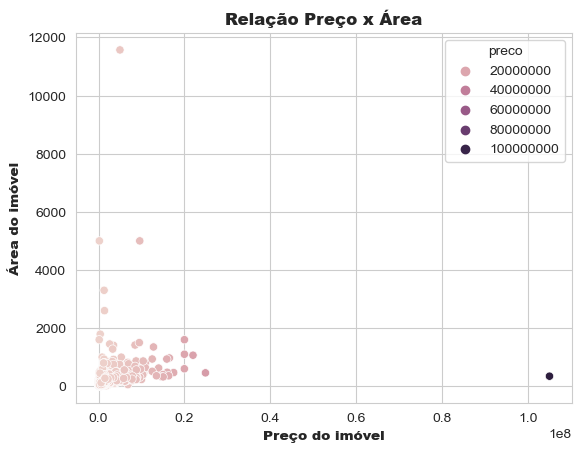

In [135]:
_=ax=sns.scatterplot(data=df, x=df.preco, y=test.area, hue=df.preco)

#configurando
_=ax.set_title('Relação Preço x Área', weight='heavy')
_=ax.set_xlabel('Preço do imóvel', weight='heavy')
_=ax.set_ylabel('Área do imóvel', weight='heavy')
